In [2]:
# setup
# Data Processing
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns

# file
import os

# folder
folder_input = '02_input'



# note for install new package
# go to miniconda prompt > type 'conda activate myenv' (this makes sure the pkg is installed in the intended env) > type 'conda install <package name>'

# check why kaggle package is compatible (I have saved a notebook to find out the package version)
# Compare to the version on my computer: miniconda prompt > type 'conda activate myenv' > type 'conda list'

In [3]:
# import data
# original data
org = pd.read_csv(os.path.join('..', folder_input, 'WA_Fn-UseC_-Telco-Customer-Churn.csv'))

# check any missing value
org.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# data cleansing

# target (turn to bool)
org = org.copy()
org['Churn'] = org['Churn'] == "Yes"

# total charges - " " to 0
org['TotalCharges'] = org['TotalCharges'].str.replace(" ", "0", case=False, regex=False)
org = org.astype({'TotalCharges': 'float64'})

# drop useless cols
org = org.drop(
    labels=['customerID'],
    axis=1
)

# org.head()

In [5]:
org.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True


In [8]:
# check all unique value
colnames = org.select_dtypes(include=['object']).columns

for i in colnames:
    print(i, ": ", org[i].unique())


gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [10]:
# contract status

stat = pd.crosstab(index=org['Churn'], columns=org['Contract'])
print(stat)

# div = divide each element in stat by its row sum, axis = 0 (by row)
stat_perc = stat.div(stat.sum(0), axis=1).round(2) * 100
print(stat_perc)


Contract  Month-to-month  One year  Two year
Churn                                       
False               2220      1307      1647
True                1655       166        48
Contract  Month-to-month  One year  Two year
Churn                                       
False               57.0      89.0      97.0
True                43.0      11.0       3.0


In [6]:
org['Is_Contract_Locked'] = org['Contract'] != 'Month-to-month'
org['Is_Contract_Locked'] = org['Is_Contract_Locked'].astype('int')
org.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Is_Contract_Locked
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,False,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True,0


In [7]:
# senior citizen
stat = pd.crosstab(index=org['Churn'], columns=org['SeniorCitizen'])
print(stat)

# div = divide each element in stat by its row sum, axis = 0 (by row)
stat_perc = stat.div(stat.sum(0), axis=1) * 100
print(stat_perc)




SeniorCitizen     0    1
Churn                   
False          4508  666
True           1393  476
SeniorCitizen          0          1
Churn                              
False          76.393832  58.318739
True           23.606168  41.681261


In [8]:
# gender
stat = pd.crosstab(index=org['Churn'], columns=org['gender'])
print(stat)

# div = divide each element in stat by its row sum, axis = 0 (by row)
stat_perc = stat.div(stat.sum(0), axis=1) * 100
print(stat_perc)

gender  Female  Male
Churn               
False     2549  2625
True       939   930
gender     Female       Male
Churn                       
False   73.079128  73.839662
True    26.920872  26.160338


<Axes: xlabel='Churn', ylabel='tenure'>

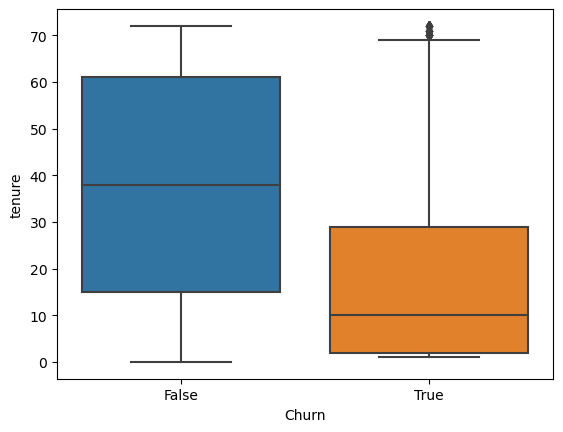

In [9]:
sns.boxplot(
    data=org,
    x='Churn',
    y='tenure'#,
    # hue='Is_Contract_Locked'
)

<Axes: xlabel='Churn', ylabel='tenure'>

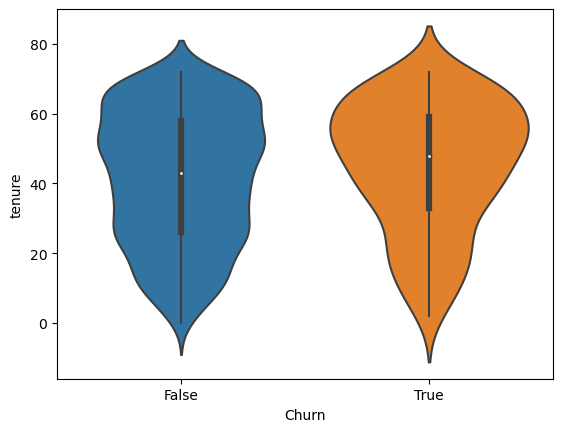

In [10]:
# 1 year contract, tenure, churn
# why one 1 year contract has higher churn than 2 year

sns.violinplot(
    data = org[org['Contract']=='One year'],
    x = 'Churn',
    y = 'tenure'
)

<Axes: xlabel='Churn', ylabel='tenure'>

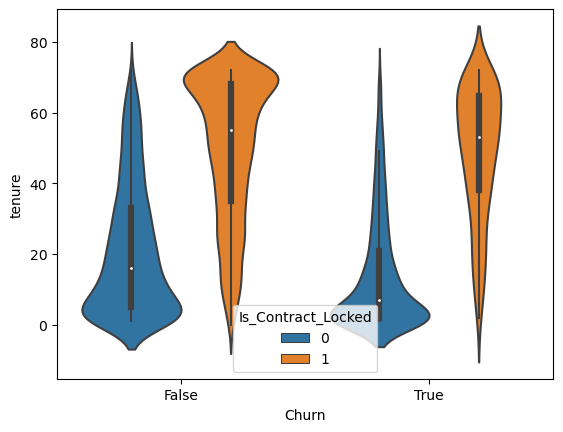

In [11]:
# churn vs tenure
sns.violinplot(
    data=org,
    x='Churn',
    y='tenure',
    hue='Is_Contract_Locked'
)


<Axes: xlabel='Contract', ylabel='tenure'>

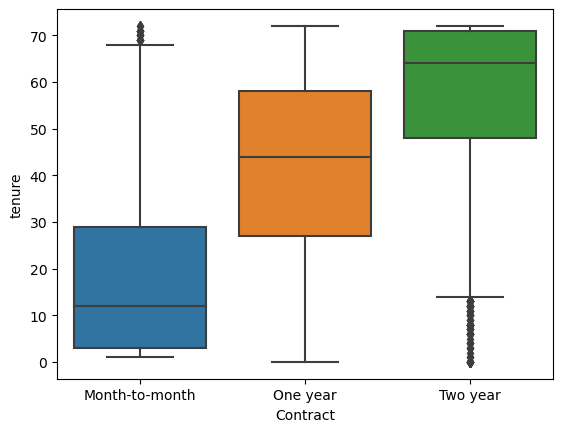

In [12]:
# contract vs tenure
sns.boxplot(
    data=org,
    x='Contract',
    y = 'tenure'
)




c:\Users\Lavinia\.conda\envs\myenv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\Lavinia\.conda\envs\myenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


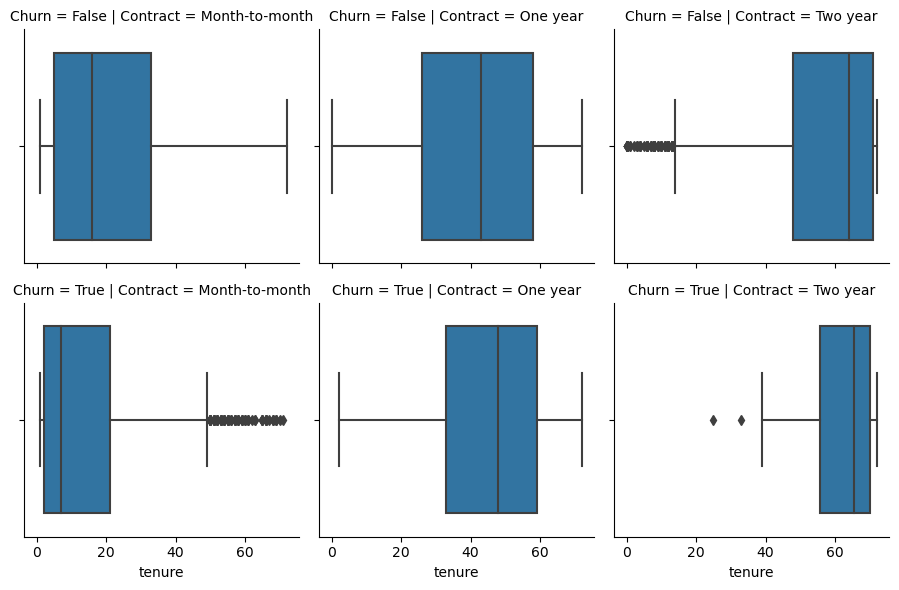

In [13]:
# tenure vs contract relationship

check = sns.FacetGrid(org, col='Contract', row='Churn')
check.map(sns.boxplot, 'tenure')

<Axes: xlabel='Is_Contract_Locked', ylabel='tenure'>

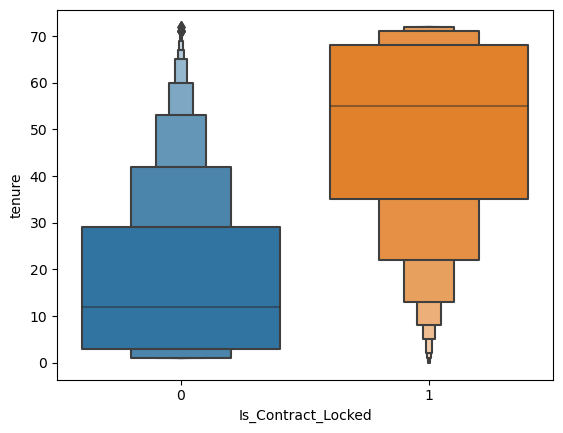

In [14]:
# contract locked and tenure

sns.boxenplot(
    data=org,
    x='Is_Contract_Locked',
    y='tenure'
)


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

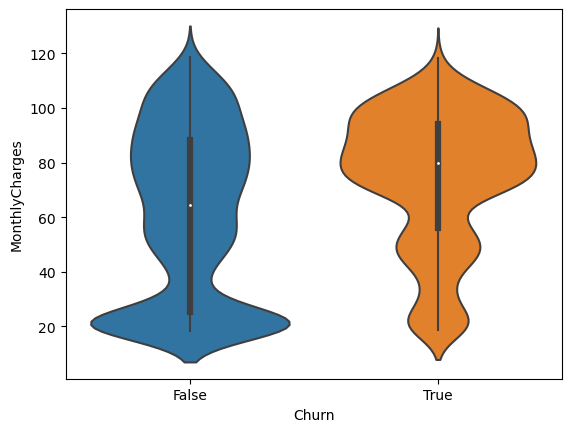

In [15]:
#monthly charges
sns.violinplot(
    data=org,
    x='Churn',
   y='MonthlyCharges' 
)

<Axes: xlabel='tenure', ylabel='TotalCharges'>

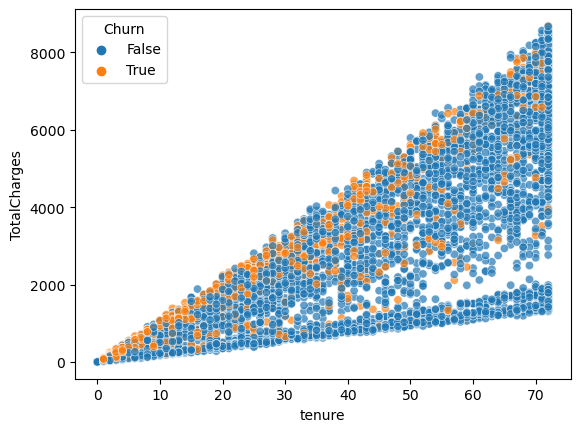

In [16]:
# total charges
sns.scatterplot(
    data=org,
    x='tenure',
   y='TotalCharges' ,
   hue='Churn',
   alpha = 0.7
)

In [17]:
# total charges, monthly charges, tenure
org['Tenure_Calculated'] = org['TotalCharges']/org['MonthlyCharges']

diff = (org['Tenure_Calculated']/org['tenure']- 1).mean()

print(
    "Difference between calculated tenure and the tenure provided by the dataset: {:.2%}"
    .format(diff), 
    )


Difference between calculated tenure and the tenure provided by the dataset: 0.03%


<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

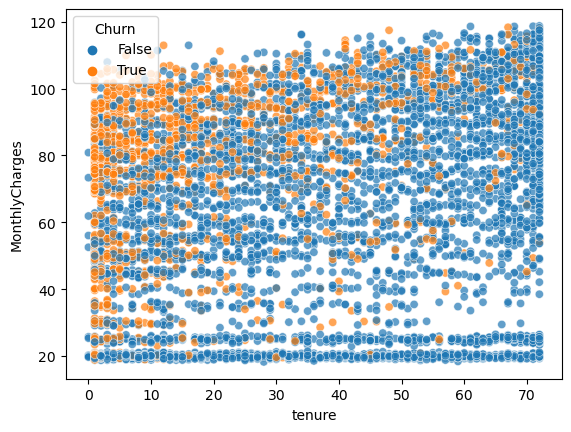

In [18]:
# total charges vs monthly charges
sns.scatterplot(
    data=org,
    x='tenure',
   y='MonthlyCharges' ,
   hue='Churn',
   alpha = 0.7
)

<Axes: xlabel='InternetService', ylabel='MonthlyCharges'>

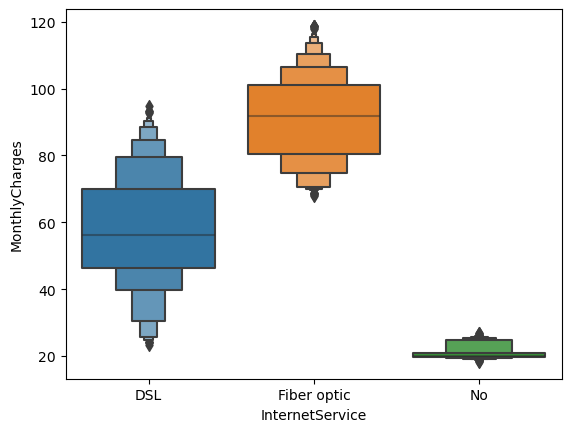

In [19]:
# internet vs monthly charge
sns.boxenplot(
    data=org,
    x = 'InternetService',
    y = 'MonthlyCharges'
)

In [20]:
# partner
stat = pd.crosstab(index=org['Churn'], columns=org['Partner'])
print(stat)

# div = divide each element in stat by its row sum, axis = 0 (by row)
stat_perc = stat.div(stat.sum(0), axis=1) * 100
print(stat_perc)

Partner    No   Yes
Churn              
False    2441  2733
True     1200   669
Partner         No        Yes
Churn                        
False    67.042021  80.335097
True     32.957979  19.664903


In [21]:
# dependents
stat = pd.crosstab(index=org['Churn'], columns=org['Dependents'])
print(stat)

# div = divide each element in stat by its row sum, axis = 0 (by row)
stat_perc = stat.div(stat.sum(0), axis=1) * 100
print(stat_perc)

Dependents    No   Yes
Churn                 
False       3390  1784
True        1543   326
Dependents        No        Yes
Churn                          
False       68.72086  84.549763
True        31.27914  15.450237


In [22]:
pd.crosstab(org['Partner'], org['Dependents'])

Dependents,No,Yes
Partner,,
No,3280,361
Yes,1653,1749


In [23]:
# new variable for estimated family size

# import def
family_size_def = pd.read_csv(os.path.join('..', folder_input, 'Family_size_def.csv'))

org = pd.merge(
    org,
    family_size_def,
    on = ['Partner', 'Dependents']
)


In [24]:
# family size

stat = pd.crosstab(index=org['Churn'], columns=org['FamilySize'])
print(stat)

# div = divide each element in stat by its row sum, axis = 0 (by row)
stat_perc = stat.div(stat.sum(0), axis=1) * 100
print(stat_perc)


FamilySize     1     2     3
Churn                       
False       2157  1517  1500
True        1123   497   249
FamilySize          1          2          3
Churn                                      
False       65.762195  75.322741  85.763293
True        34.237805  24.677259  14.236707


In [25]:
# monthly charges per head
org['MonthlyChargesPerHead'] = org['MonthlyCharges']/org['FamilySize']

<Axes: xlabel='Churn', ylabel='MonthlyChargesPerHead'>

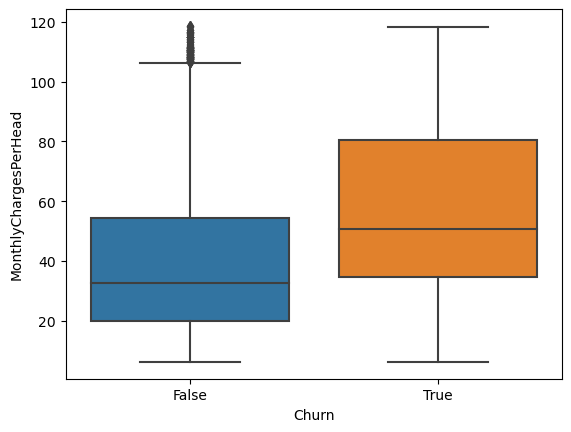

In [26]:
sns.boxplot(
    org,
    x = 'Churn',
    y ='MonthlyChargesPerHead'
    )

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

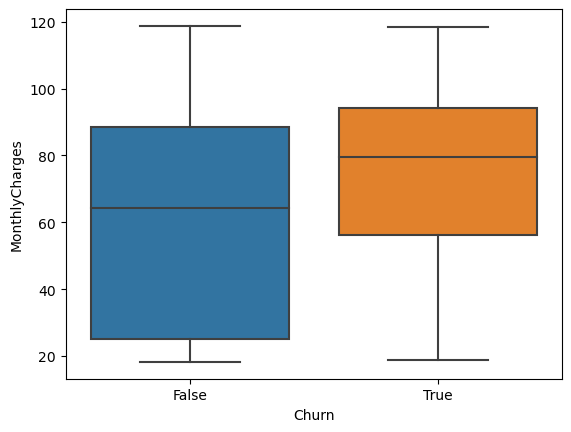

In [27]:
sns.boxplot(
    org,
    x = 'Churn',
    y ='MonthlyCharges'
)

In [28]:
# add is internet
org['Is_Internet'] = (org['InternetService'] != 'No').astype('int')

In [29]:
org.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Is_Contract_Locked,Tenure_Calculated,FamilySize,MonthlyChargesPerHead,Is_Internet
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,False,0,1.000000,2,14.925,1
1,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Electronic check,104.80,3046.05,True,0,29.065363,2,52.400,1
2,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,...,No,Credit card (automatic),100.35,5681.10,False,1,56.612855,2,50.175,1
3,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,...,No,Bank transfer (automatic),19.80,202.25,False,1,10.214646,2,9.900,0
4,Female,0,Yes,No,58,Yes,Yes,DSL,No,Yes,...,Yes,Credit card (automatic),59.90,3505.10,False,1,58.515860,2,29.950,1


In [30]:
org.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Is_Contract_Locked',
       'Tenure_Calculated', 'FamilySize', 'MonthlyChargesPerHead',
       'Is_Internet'],
      dtype='object')

In [31]:
# check all No phone service / no internet service to no
org['MultipleLines'] = org['MultipleLines'].str.replace("No phone service", "No", case=False, regex=False)

# for col ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
org = org.replace("No internet service", "No")
org = org.replace("No phone service", "No")


In [32]:
# only columns I think are useful
cleaned_data = org[[
     #target
     'Churn',
     
     # demo
     'gender',
     'SeniorCitizen',
     'Partner',
     'Dependents',
     'FamilySize',
     
     # subscribed service
     'PhoneService',
     'MultipleLines',
     'InternetService',   
     'Is_Internet',
     'OnlineSecurity',
     'OnlineBackup',
     'DeviceProtection',
     'TechSupport',
     'StreamingTV',
     'StreamingMovies',
     'PaperlessBilling',
     'PaymentMethod',
     
     # spending behavior
     'tenure',
     'MonthlyCharges',
     # 'TotalCharges',
     'MonthlyChargesPerHead',
     'Contract',
     'Is_Contract_Locked'
    ]]



In [33]:
# export data
cleaned_data.to_csv(
    os.path.join('..', folder_input, 'cleaned_data.csv'),
    index = False
    )
